### Importing Libraries

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')

### |Loading the dataset

In [73]:
#creating database connection
conn = sqlite3.connect('inventory.db')

#fetching vendor summary data
df = pd.read_sql_query("select * from vendor_sales_summary", conn)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,139150.0,5.000484e+06,661902.43,255672.60,68601.68,1189231.90,23.782338,0.959126,1.312032
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,155918.0,4.693576e+06,552380.52,286484.41,144929.24,889534.56,18.952172,0.950499,1.233839
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,183423.0,4.450808e+06,453458.92,337024.30,123780.22,1032504.59,23.198137,0.978741,1.302052
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,193701.0,4.335109e+06,412976.38,355911.65,257032.07,1073911.05,24.772412,0.960428,1.329300
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,132388.0,4.119642e+06,535791.61,243248.68,257032.07,1096436.11,26.614839,0.958576,1.362673


In [141]:
df.to_csv(r'E:\Vendor Performance Analysis\vendor_sales_summary.csv')

### Exploratory Data Analysis

In [74]:
#1)Previously, we examined the various tables in the database to identify key variables, understand their relationships, and determine which ones should be included in the final analysis.
#2)In this phase of EDA, we will analyze the resultant table to gain insights into the distribution of each colummn.This will help us understand data patterns, identify anomalies, and ensure data quality before proceeding with furthur analysis.

In [75]:
#summary statistics
df.describe()

,VendorNumber,Brand,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
count,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04,1.069200e+04,10692.000000,10692.000000
mean,10650.649458,18039.228769,24.385303,35.643671,847.360550,3140.886831,3.010669e+04,2986.825196,4.096085e+04,18250.986415,1727.069088,61433.763214,1.085415e+04,-inf,1.671811,2.452973
std,18753.519148,12662.187074,109.269375,148.246016,664.309212,11095.086769,1.230678e+05,10664.542280,1.632413e+05,43858.084000,10711.653552,60938.458032,4.194126e+04,NaN,5.959705,8.364629
min,2.000000,58.000000,0.360000,0.490000,50.000000,1.000000,7.100000e-01,0.000000,0.000000e+00,0.000000,0.000000,0.090000,-5.314590e+04,-inf,0.000000,0.000000
25%,3951.000000,5793.500000,6.840000,10.990000,750.000000,36.000000,4.534575e+02,32.000000,6.996475e+02,283.950000,4.720000,14069.870000,3.748750e+01,9.647539e+00,0.771882,1.106777
50%,7153.000000,18761.500000,10.455000,15.990000,750.000000,262.000000,3.655465e+03,250.000000,5.059130e+03,2730.710000,44.755000,50293.620000,1.232685e+03,2.833296e+01,0.951293,1.395342
75%,9552.000000,25514.250000,19.482500,28.990000,750.000000,1975.750000,2.073824e+04,1859.250000,2.744327e+04,15617.830000,405.522500,79528.990000,7.808430e+03,3.841957e+01,1.010485,1.623892
max,201359.000000,90631.000000,5681.810000,7499.990000,20000.000000,337660.000000,3.811252e+06,326725.000000,5.000484e+06,661902.430000,355911.650000,257032.070000,1.189232e+06,9.971655e+01,274.400000,352.800000


ValueError: autodetected range of [-inf, 99.71655328798185] is not finite

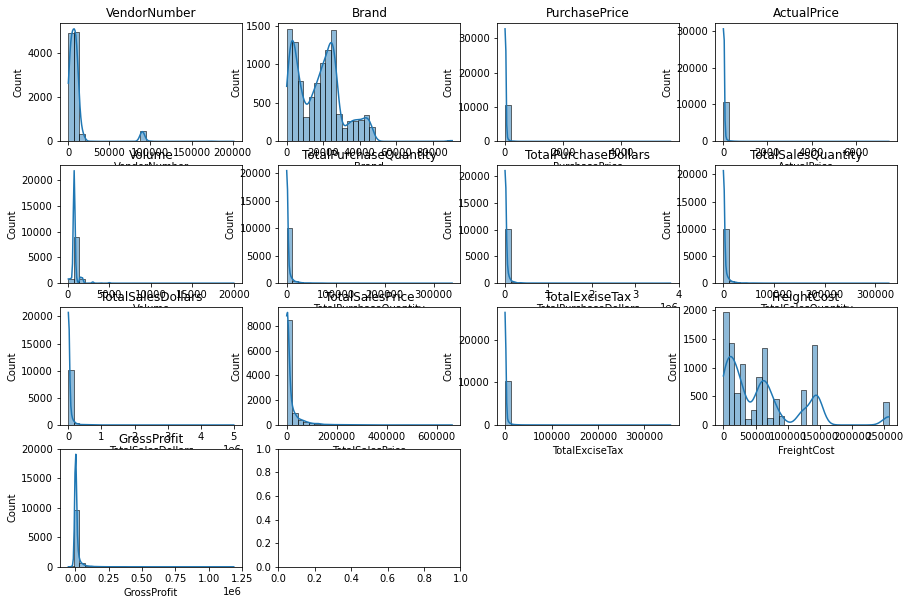

In [76]:
#Distribution Plots for Numerical Columns
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1) #Adjust grid layout as needed
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

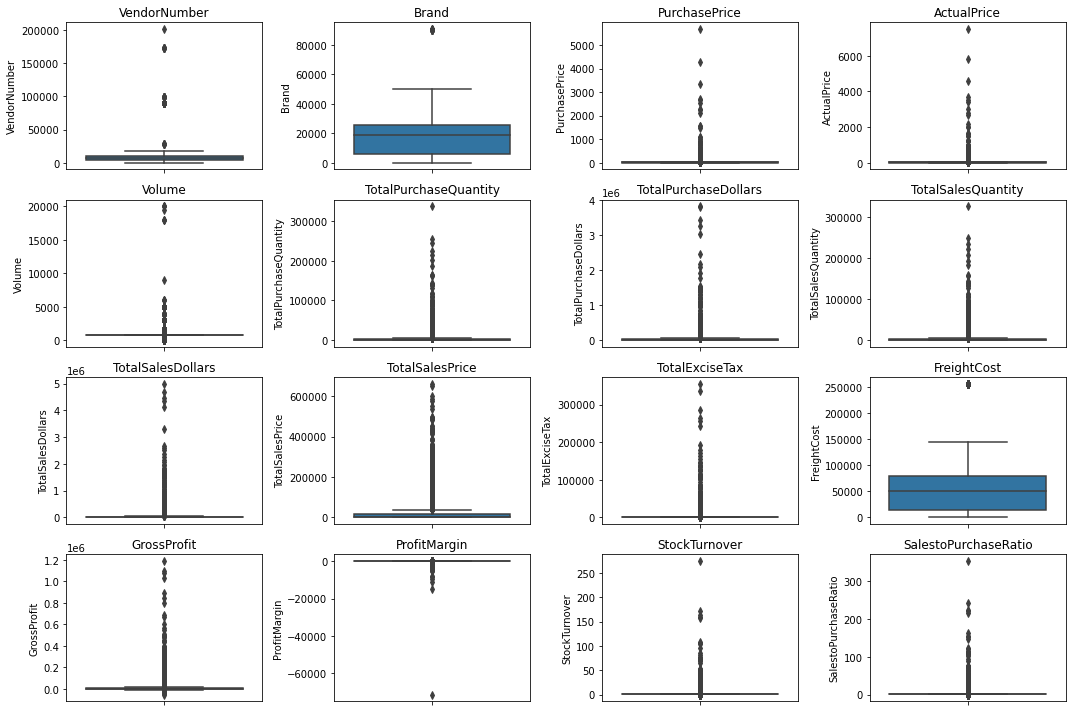

In [77]:
plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1) #Adjust grid layout as needed
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

### Summary Statistics Insights:

Negative & Zero values

In [ ]:
#1)Gross Profit: Minimum value is -52,002.78, indicating losses. Some products or transactions may be selling at a loss due to high costs or selling at discounts lower than the purchase price.
#2)Profit Margin: Has a minimum of negative infinity, which suggests cases where revenue is zero or even lower than costs.
#3)Total Sales Quantity & Sales Dollars: Minimum values are 0, meaning some products were purchased but never sold. These could be slow moving or obscelete stock.

Outlines indicated by high Standard Deviations:

In [ ]:
#1)Purchase & Actual Prices: The max values(5,681 & 7,499.99) are significantly higher than the mean(24.39&35.64), indicating potential premium products.
#2)Freight Cost: Huge variation, from 0.09 to 257,032.07, suggests logistics inefficiencies or bulk shipments.
#3)Stock Turnover: Ranges from 0 to 274.5, implying some products sell extremely fast while others remain in stock indefinitely. Value more than1 indicates that sold quantity for that product is higher than purchased quantity due to either scales are being fulfilled from older stock.


In [78]:
#let's filter the data by removing inconsistencies
df = pd.read_sql_query("""SELECT *
FROM vendor_sales_summary
WHERE GrossProfit>0
AND ProfitMargin>0
AND TotalSalesQuantity>0""" , conn)
 

In [79]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,139150.0,5.000484e+06,661902.43,255672.60,68601.68,1189231.90,23.782338,0.959126,1.312032
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,155918.0,4.693576e+06,552380.52,286484.41,144929.24,889534.56,18.952172,0.950499,1.233839
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,183423.0,4.450808e+06,453458.92,337024.30,123780.22,1032504.59,23.198137,0.978741,1.302052
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,193701.0,4.335109e+06,412976.38,355911.65,257032.07,1073911.05,24.772412,0.960428,1.329300
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,132388.0,4.119642e+06,535791.61,243248.68,257032.07,1096436.11,26.614839,0.958576,1.362673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8392,3960,DIAGEO NORTH AMERICA INC,2626,Crown Royal Apple,1.42,1.99,50.0,2,2.84,14.0,2.786000e+01,5.97,0.73,257032.07,25.02,89.806174,7.000000,9.809859
8393,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,5.0,1.595000e+01,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667
8394,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134.0,6.566000e+01,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829
8395,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,69.0,1.373100e+02,71.64,14.49,257032.07,135.84,98.929430,69.000000,93.408163


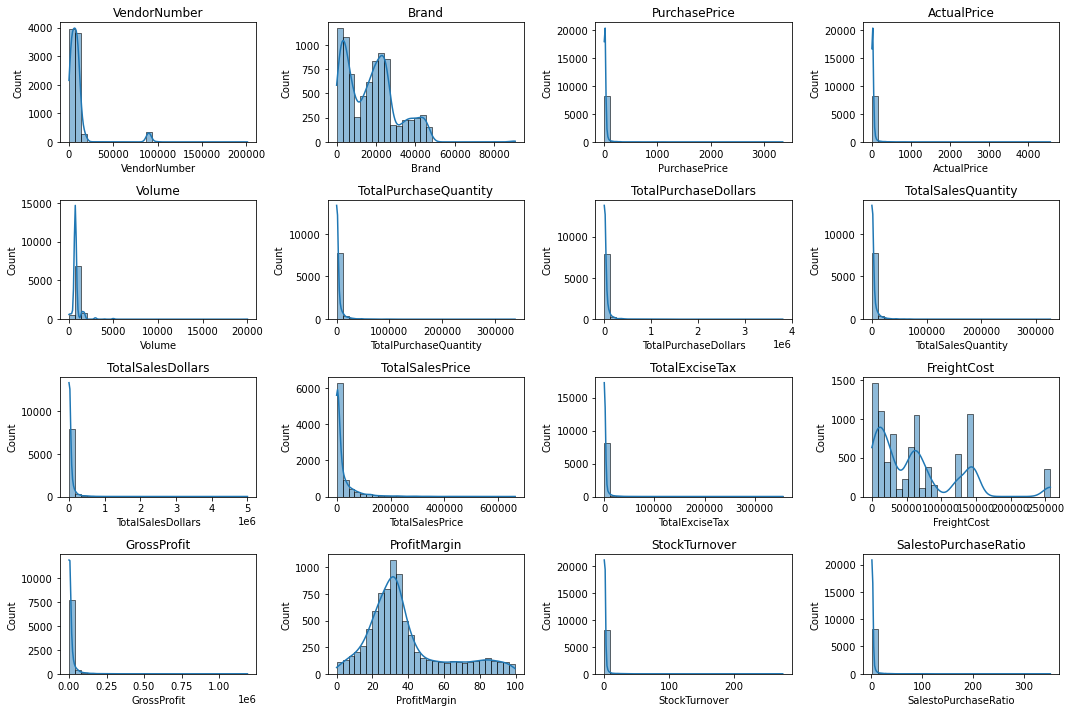

In [80]:
#Distribution Plots for Numerical Columns
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1) #Adjust grid layout as needed
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

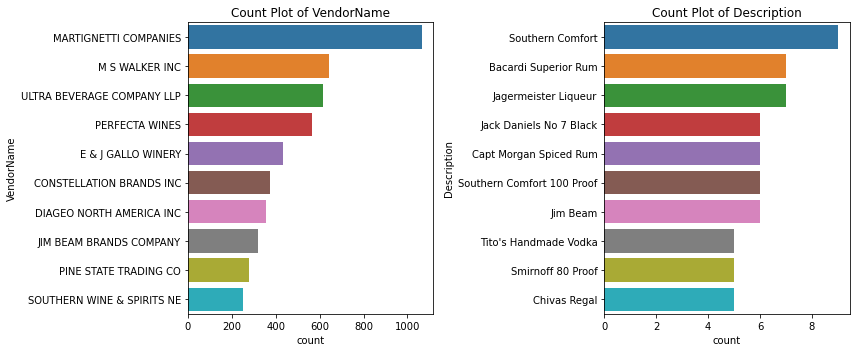

In [81]:
#Count Plots for Numerical Columns
categorical_cols = ["VendorName","Description"]

plt.figure(figsize=(12,5))
for i,col in enumerate(categorical_cols):
    plt.subplot(1,2,i+1)
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10]) #top 10 categories
    plt.title(f"Count Plot of {col}")
plt.tight_layout()
plt.show()

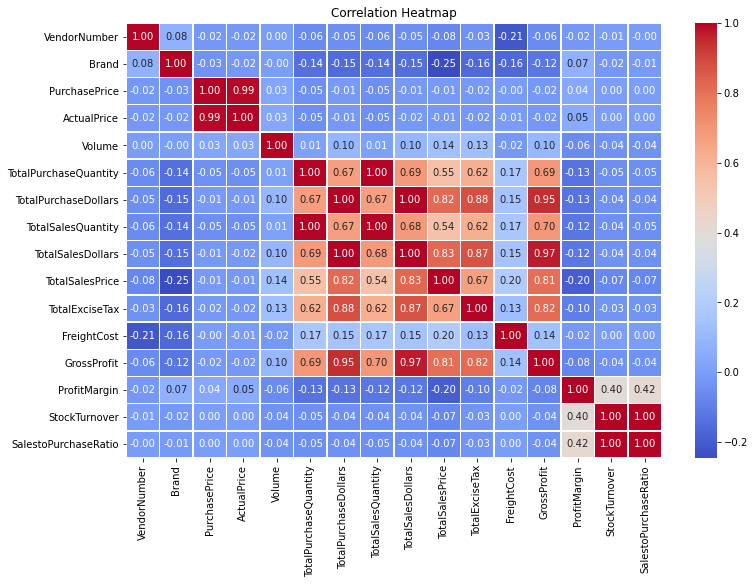

In [82]:
#Correlation Heatmap
plt.figure(figsize=(12,8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

### Correlation Insights

In [ ]:
#1)PurchasePrice has weak correlations with TotalSalesDollars(-0.012) and GrossProfit(-0.016), suggesting that price variations do not significantly inpact sales revenue or profit.
#2)Strong correlation between total purchase quantity and total sales quantity(0.999), confirming efficient inventory turnover.
#3)Negative correlation between profit margin & total sales price(-0.179) suggests that as sales price increases, margin decrease, possibly due to competitive pricing pressures.
#4)StockTurnover has weak negative correlations with both GrossProfit(-0.038) and ProfitMargin(-0.055), indicating that fastner turnover does not neccesariluy result in higher profitability.

### Data Analysis

In [83]:
brand_performance = df.groupby('Description').agg({
    'TotalSalesDollars':'sum','ProfitMargin':'mean'}).reset_index()

In [84]:
low_sales_threshold= brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold= brand_performance['ProfitMargin'].quantile(0.85)

In [85]:
low_sales_threshold

558.57

In [86]:
high_margin_threshold

65.49086974324322

In [87]:
#Filter brands with low sales but high profit margins
target_brands = brand_performance[
   (brand_performance['TotalSalesDollars'] <= low_sales_threshold) &
   (brand_performance['ProfitMargin'] >= high_margin_threshold)
]
print("Brands with low Sales but High Profit Margins:")
display(target_brands.sort_values('TotalSalesDollars'))

Brands with low Sales but High Profit Margins:


,Description,TotalSalesDollars,ProfitMargin
6086,Santa Rita Organic Svgn Bl,9.99,66.466466
2324,Debauchery Pnt Nr,11.58,65.975820
2038,Concannon Glen Ellen Wh Zin,15.95,83.448276
2152,Crown Royal Apple,27.86,89.806174
6124,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
6472,Spring 44 Gin,531.81,69.929110
922,Bowman's Light Vodka,535.00,72.052336
2233,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860


In [88]:
brand_performance = brand_performance[brand_performance['TotalSalesDollars']<10000]

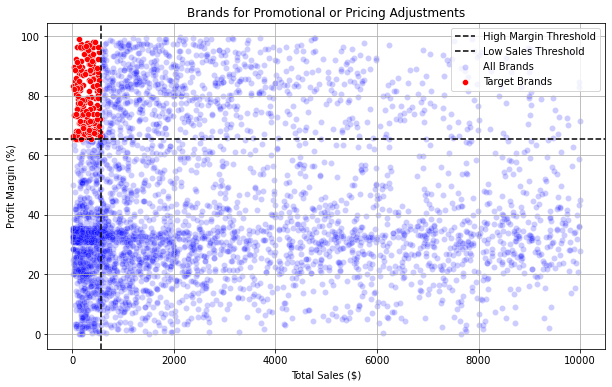

In [89]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=brand_performance, x='TotalSalesDollars', y='ProfitMargin', color="blue", label="All Brands", alpha = 0.2)
sns.scatterplot(data=target_brands, x='TotalSalesDollars', y='ProfitMargin', color="red", label="Target Brands")

plt.axhline(high_margin_threshold, linestyle='--', color='black', label="High Margin Threshold")
plt.axvline(low_sales_threshold, linestyle='--', color='black', label="Low Sales Threshold")

plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotional or Pricing Adjustments")
plt.legend()
plt.grid(True)
plt.show()

Which vendors and brands demonstrate the highest sales performance?

In [90]:
def format_dollars(value):
    if value>= 1_000_000:
        return f"{value / 1_000_000:.2f}M"
    elif value >= 1_000:
        return f"{value / 1_000:.2f}K"
    else:
        return str(value)

In [91]:
#Top vendors & Brands by Sales Performance
top_vendors = df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)
top_brands = df.groupby("Description")["TotalSalesDollars"].sum().nlargest(10)
top_vendors

VendorName
DIAGEO NORTH AMERICA INC      6.540062e+07
MARTIGNETTI COMPANIES         3.792111e+07
PERNOD RICARD USA             3.090688e+07
JIM BEAM BRANDS COMPANY       3.022708e+07
BACARDI USA INC               2.418739e+07
CONSTELLATION BRANDS INC      2.348246e+07
E & J GALLO WINERY            1.781419e+07
BROWN-FORMAN CORP             1.737940e+07
ULTRA BEVERAGE COMPANY LLP    1.589650e+07
M S WALKER INC                1.417389e+07
Name: TotalSalesDollars, dtype: float64

In [92]:
top_brands

Description
Jack Daniels No 7 Black    7782908.55
Tito's Handmade Vodka      7190281.74
Grey Goose Vodka           7039850.98
Capt Morgan Spiced Rum     6146398.12
Absolut 80 Proof           6109540.25
Jameson Irish Whiskey      5510493.47
Ketel One Vodka            4938376.07
Baileys Irish Cream        3932179.19
Kahlua                     3467609.85
Tanqueray                  3379734.86
Name: TotalSalesDollars, dtype: float64

In [93]:
top_brands.apply(lambda x: format_dollars(x))

Description
Jack Daniels No 7 Black    7.78M
Tito's Handmade Vodka      7.19M
Grey Goose Vodka           7.04M
Capt Morgan Spiced Rum     6.15M
Absolut 80 Proof           6.11M
Jameson Irish Whiskey      5.51M
Ketel One Vodka            4.94M
Baileys Irish Cream        3.93M
Kahlua                     3.47M
Tanqueray                  3.38M
Name: TotalSalesDollars, dtype: object

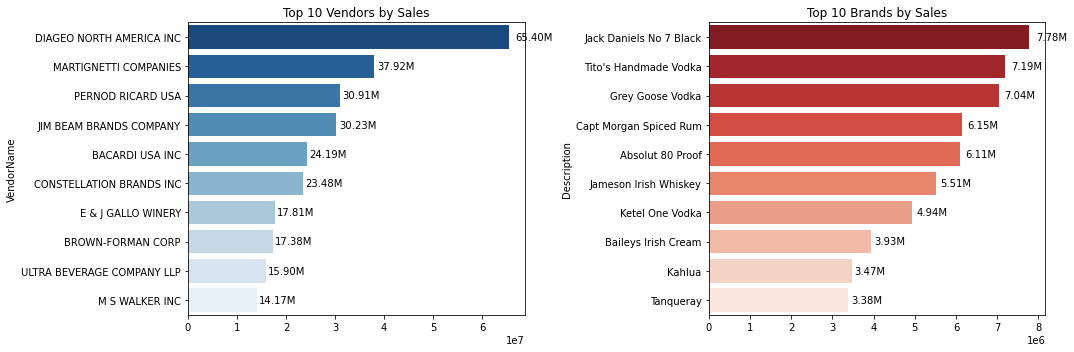

In [94]:
plt.figure(figsize=(15,5))

#Plot for Top Vendors
plt.subplot(1, 2, 1)
ax1 = sns.barplot(y=top_vendors.index, x=top_vendors.values, palette="Blues_r")
plt.title("Top 10 Vendors by Sales")

for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width()*0.02),
             bar.get_y() + bar.get_height() / 2,
             format_dollars(bar.get_width()),
             ha='left', va='center', fontsize=10, color='black')

#Plot for Top Brands
plt.subplot(1,2,2)
ax2 = sns.barplot(y=top_brands.index.astype(str), x=top_brands.values, palette="Reds_r")
plt.title("Top 10 Brands by Sales")

for bar in ax2.patches:
    ax2.text(bar.get_width() + (bar.get_width()*0.02),
             bar.get_y() + bar.get_height() / 2,
             format_dollars(bar.get_width()),
             ha='left', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

### Which vendors contribute the most to total purchase dollars?

In [95]:
vendor_performance = df.groupby('VendorName').agg({
    'TotalPurchaseDollars':'sum',
    'GrossProfit':'sum',
    'TotalSalesDollars':'sum'
}).reset_index()
vendor_performance.shape

(119, 4)

In [101]:
vendor_performance['Purchase_Contribution%'] = vendor_performance['TotalPurchaseDollars']/ vendor_performance['TotalPurchaseDollars'].sum()*100

In [102]:
vendor_performance = round(vendor_performance.sort_values('PurchaseContribution%', ascending= False),2)

In [103]:
#Display Top 10 Vendors
top_vendors = vendor_performance.head(10)
top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars)
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%,Purchase_Contribution%
25,DIAGEO NORTH AMERICA INC,49.57M,15.83M,65.40M,16.29,16.29
57,MARTIGNETTI COMPANIES,25.28M,12.64M,37.92M,8.31,8.31
68,PERNOD RICARD USA,23.70M,7.21M,30.91M,7.79,7.79
46,JIM BEAM BRANDS COMPANY,23.13M,7.10M,30.23M,7.60,7.60
6,BACARDI USA INC,17.38M,6.80M,24.19M,5.71,5.71
20,CONSTELLATION BRANDS INC,15.19M,8.29M,23.48M,4.99,4.99
11,BROWN-FORMAN CORP,12.91M,4.47M,17.38M,4.24,4.24
30,E & J GALLO WINERY,12.02M,5.79M,17.81M,3.95,3.95
106,ULTRA BEVERAGE COMPANY LLP,11.01M,4.89M,15.90M,3.62,3.62
79,SAZERAC CO INC,9.70M,3.00M,12.70M,3.19,3.19


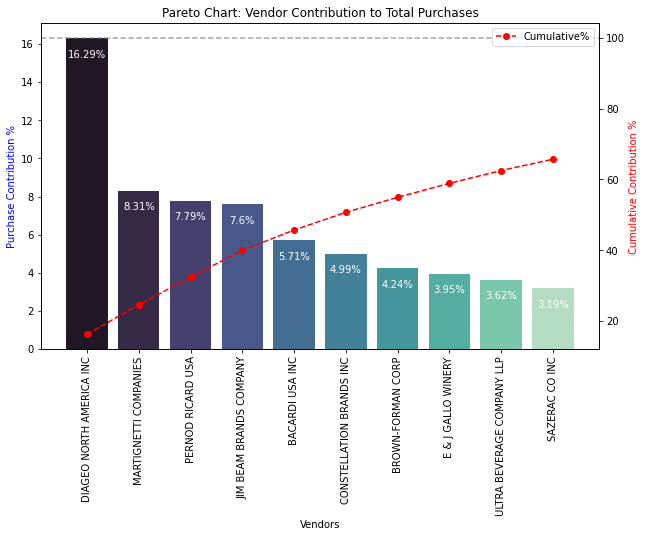

In [104]:
top_vendors['Cumulative_Contribution%'] = top_vendors['Purchase_Contribution%'].cumsum()

fig, ax1 = plt.subplots(figsize=(10,6))

#Bar plot for PurchaseContribution%
sns.barplot(x=top_vendors['VendorName'], y=top_vendors['Purchase_Contribution%'], palette="mako", ax=ax1)

for i,value in enumerate(top_vendors['Purchase_Contribution%']):
    ax1.text(i,value-1,str(value)+'%',ha='center',fontsize=10,color='white')

#Line plot for cumulative Contribution%
ax2 = ax1.twinx()
ax2.plot(top_vendors['VendorName'], top_vendors['Cumulative_Contribution%'], color='red',marker='o',linestyle='dashed',label='Cumulative%')

ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_ylabel('Purchase Contribution %', color='blue')
ax2.set_ylabel('Cumulative Contribution %', color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')

ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')

plt.show()

### How much of total procurement is dependent on the top vendors?

In [105]:
print(f"Total Purchase Contribution of top 10 vendors is {round(top_vendors['Purchase_Contribution%'].sum(),2)} %")

Total Purchase Contribution of top 10 vendors is 65.69 %


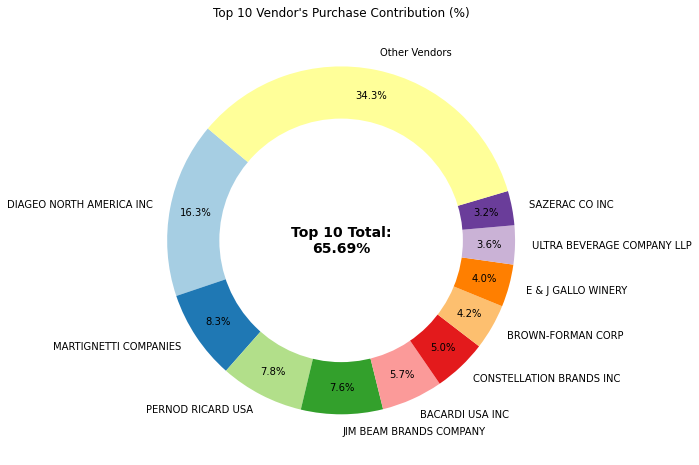

In [108]:
vendors = list(top_vendors['VendorName'].values)
purchase_contributions = list(top_vendors['Purchase_Contribution%'].values)
total_contribution = sum(purchase_contributions)
remaining_contribution = 100 - total_contribution

#Append "Other Vendors" category
vendors.append("Other Vendors")
purchase_contributions.append(remaining_contribution)

#Donut Chart
fig, ax = plt.subplots(figsize=(8,8))
wedges, texts, autotexts = ax.pie(purchase_contributions, labels=vendors, autopct='%1.1f%%',
                                  startangle=140, pctdistance=0.85, colors=plt.cm.Paired.colors)

#Draw a white circle in the centre to create a "donut" effect
centre_circle = plt.Circle((0,0),0.70, fc='white')
fig.gca().add_artist(centre_circle)

#Add Total Contribution annotation in the centre
plt.text(0,0,f"Top 10 Total:\n{total_contribution:.2f}%", fontsize=14, fontweight='bold', ha='center', va='center')

plt.title("Top 10 Vendor's Purchase Contribution (%)")
plt.show()

### Does purchasing in bulk reduce the unit price, and what is the optimal purchase volume for cost savings?

In [109]:
df['UnitPurchasePrice'] = df['TotalPurchaseDollars'] / df['TotalPurchaseQuantity']

In [110]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio,UnitPurchasePrice
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,139150.0,5.000484e+06,661902.43,255672.60,68601.68,1189231.90,23.782338,0.959126,1.312032,26.27
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,155918.0,4.693576e+06,552380.52,286484.41,144929.24,889534.56,18.952172,0.950499,1.233839,23.19
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,183423.0,4.450808e+06,453458.92,337024.30,123780.22,1032504.59,23.198137,0.978741,1.302052,18.24
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,193701.0,4.335109e+06,412976.38,355911.65,257032.07,1073911.05,24.772412,0.960428,1.329300,16.17
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,132388.0,4.119642e+06,535791.61,243248.68,257032.07,1096436.11,26.614839,0.958576,1.362673,21.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8392,3960,DIAGEO NORTH AMERICA INC,2626,Crown Royal Apple,1.42,1.99,50.0,2,2.84,14.0,2.786000e+01,5.97,0.73,257032.07,25.02,89.806174,7.000000,9.809859,1.42
8393,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,5.0,1.595000e+01,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667,1.32
8394,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134.0,6.566000e+01,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829,0.39
8395,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,69.0,1.373100e+02,71.64,14.49,257032.07,135.84,98.929430,69.000000,93.408163,1.47


In [111]:
df["OrderSize"] = pd.qcut(df["TotalPurchaseQuantity"], q=3, labels=["Small","Medium","Large"])

In [112]:
df[['OrderSize','TotalPurchaseQuantity']]

,OrderSize,TotalPurchaseQuantity
0,Large,145080
1,Large,164038
2,Large,187407
3,Large,201682
4,Large,138109
...,...,...
8392,Small,2
8393,Small,2
8394,Small,6
8395,Small,1


In [114]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
OrderSize,
Small,39.123578
Medium,15.267875
Large,10.738232


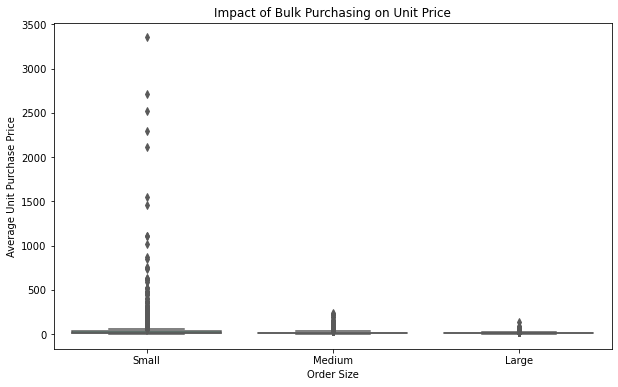

In [116]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="OrderSize", y="UnitPurchasePrice", palette="Set2")
plt.title("Impact of Bulk Purchasing on Unit Price")
plt.xlabel("Order Size")
plt.ylabel("Average Unit Purchase Price")
plt.show()

In [117]:
#1)Vendors buying in bulk (Large Order Size) get the lowest unit price ($10.78 per unit), meaning higher margins if they can manage inventory efficiently.
#2)The price difference between Small and Large orders is substantial (-72% reduction in unit cost)
#3)This suggests that bulk pricing strategies successfully encourage vendors to purchase in larger volumes, leading to higher overall sales despite lower per-unit revenue. 

### Which vendors have low inventory turnover, indicating excess stock and slow-moving products?

In [122]:
df[df['StockTurnover']<1].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover',ascending = True).head(10)

,StockTurnover
VendorName,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
Dunn Wine Brokers,0.757106
CENTEUR IMPORTS LLC,0.757373
WALPOLE MTN VIEW WINERY,0.760193
Circa Wines,0.763511
SOUTHERN GLAZERS W&S OF NE,0.773490
TAMWORTH DISTILLING,0.793831
FULCHINO VINEYARD INC,0.800045


### How much capital is locked in unsold inventory per vendor, and which vendors contribute the most to it?

In [123]:
df["UnsoldInventoryValue"] = (df["TotalPurchaseQuantity"] - df["TotalSalesQuantity"])* df["PurchasePrice"]
print('Total Unsold Capital:',format_dollars(df["UnsoldInventoryValue"].sum()))

Total Unsold Capital: 11.03M


In [124]:
#Aggregate Capital Locked per vendor
inventory_value_per_vendor = df.groupby("VendorName")["UnsoldInventoryValue"].sum().reset_index()

#Sort Vendors with the Highest Locked Capital
inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by="UnsoldInventoryValue",ascending=False)
inventory_value_per_vendor['UnsoldInventoryValue'] = inventory_value_per_vendor['UnsoldInventoryValue'].apply(format_dollars)
inventory_value_per_vendor.head(10)

,VendorName,UnsoldInventoryValue
25,DIAGEO NORTH AMERICA INC,2.12M
68,PERNOD RICARD USA,1.16M
46,JIM BEAM BRANDS COMPANY,1.10M
57,MARTIGNETTI COMPANIES,603.72K
116,WILLIAM GRANT & SONS INC,589.20K
30,E & J GALLO WINERY,577.81K
20,CONSTELLATION BRANDS INC,535.59K
61,MOET HENNESSY USA INC,491.90K
11,BROWN-FORMAN CORP,484.91K
79,SAZERAC CO INC,481.12K


### What is the 95% confidence intervals for profit margins of top-performing and low-performing vendors.

In [125]:
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

In [126]:
top_vendors = df[df["TotalSalesDollars"]>=top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"]<=low_threshold]["ProfitMargin"].dropna()


In [127]:
top_vendors

0       23.782338
1       18.952172
2       23.198137
3       24.772412
4       26.614839
          ...    
3353    75.714338
3458    79.672040
3613    85.782102
4657    93.075184
4822    95.012530
Name: ProfitMargin, Length: 2100, dtype: float64

In [128]:
low_vendors

5507     3.476742
5578     8.591691
5583     1.677308
5603     7.239599
5606     1.323192
          ...    
8392    89.806174
8393    83.448276
8394    96.436186
8395    98.929430
8396    99.166079
Name: ProfitMargin, Length: 2100, dtype: float64

In [137]:
def confidence_interval(data, confidence=0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data)) #Standard error
    t_critical = stats.t.ppf((1 + confidence)/2, df =len(data)-1)
    margin_of_error = t_critical * std_err
    return mean_val, mean_val-margin_of_error,mean_val+margin_of_error

Top Vendors 95% CI: (28.82, 29.71), Mean: 29.27
Low Vendors 95% CI: (40.53, 42.70), Mean: 41.62


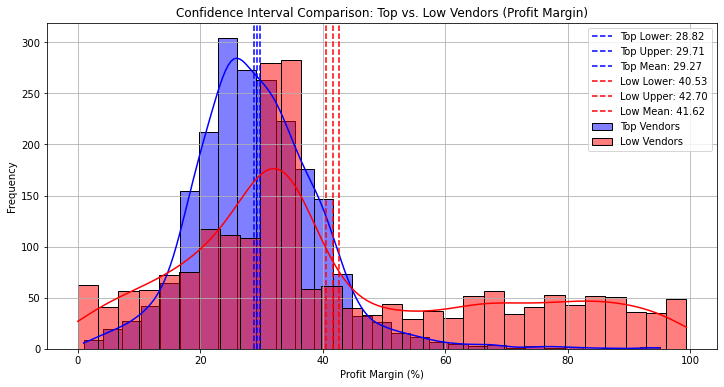

In [139]:
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

print(f"Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}), Mean: {top_mean:.2f}") 
print(f"Low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}), Mean: {low_mean:.2f}")

plt.figure(figsize=(12, 6))

#Top Vendors Plot
sns.histplot(top_vendors, kde=True, color="blue", bins=30, alpha=0.5, label="Top Vendors") 
plt.axvline(top_lower, color="blue", linestyle="--", label=f"Top Lower: {top_lower:.2f}") 
plt.axvline(top_upper, color="blue", linestyle="--", label=f"Top Upper: {top_upper:.2f}") 
plt.axvline(top_mean, color="blue", linestyle="--", label=f"Top Mean: {top_mean:.2f}")

#Low Vendors Plot
sns.histplot(low_vendors, kde=True, color="red", bins=30, alpha=0.5, label="Low Vendors")
plt.axvline(low_lower, color="red", linestyle="--", label=f"Low Lower: {low_lower:.2f}")
plt.axvline(low_upper, color="red", linestyle="--", label=f"Low Upper: {low_upper:.2f}")
plt.axvline(low_mean, color="red", linestyle="--", label=f"Low Mean: {low_mean:.2f}")

#Finalize Plot
plt.title("Confidence Interval Comparison: Top vs. Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

In [140]:
#1)The confidence interval for low-performing vendors (40.48% to 42.62%) is significantly higher than that of top-performing vendors (30.74% to 31.61%).
#2)This suggests that vendors with lower sales tend to maintain higher profit margins, potentially due to premium pricing or lower operational costs.
#3)For High-Performing Vendors: If they aim to improve profitability, they could explore selective price adjustments, cost optimization, or bundling strategies.
#4)For Low-Performing Vendors: Despite higher margins, their low sales volume might indicate a need for better marketing, competitive pricing, or improved distribution strategies